<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Lachno-abund" data-toc-modified-id="Lachno-abund-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Lachno abund</a></span></li><li><span><a href="#anx-taxa" data-toc-modified-id="anx-taxa-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>anx taxa</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* plotting lachnospiraceae abundances for curatedMG dataset

# Var

In [1]:
data_dir = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/combined_GTDBr95/LLMGP/kraken/'
brk_file = file.path(data_dir, 'all-combined-bracken.tsv')

D = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/combined_GTDBr86/profiles/kraken/'
meta_file = file.path(D, 'Global_metagenomes_Metadata.csv')


# Init

In [4]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(LeyLabRMisc)
Init()

In [5]:
set.seed(573)

# Load

In [6]:
# bracken abundances
brk = read_bracken(brk_file) %>%
    mutate.(Sample = gsub('[+.-]+', '_', Sample))
brk

name,taxonomy_id,taxonomy_lvl,Domain,Phylum,Class,Order,Family,Genus,Species,Sample,Abundance
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
s__Lachnoclostridium sp003526525,195340,S,Bacteria,Firmicutes_A,Clostridia,Lachnospirales,Lachnospiraceae,Lachnoclostridium,Lachnoclostridium sp003526525,halbarad_11_0_0,0
s__TM7x sp900556885,222438,S,Bacteria,Patescibacteria,Saccharimonadia,Saccharimonadales,Saccharimonadaceae,TM7x,TM7x sp900556885,halbarad_11_0_0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
s__Yonghaparkia sp001425665,187793,S,Bacteria,Actinobacteriota,Actinomycetia,Actinomycetales,Microbacteriaceae,Yonghaparkia,Yonghaparkia sp001425665,SZAXPI017592_142,0
s__Bacillus_A tropicus,124195,S,Bacteria,Firmicutes,Bacilli,Bacillales,Bacillaceae_G,Bacillus_A,Bacillus_A tropicus,SZAXPI017592_142,0


In [7]:
# sample metadata (filter & select 1 sample per individual)
meta = Fread(meta_file) %>%
    slice_sample.(.by=c(subjectID)) %>%
    mutate.(Sample = gsub('[+.-]+', '_', Sample)) %>%
    filter.(!is.na(non_westernized)) %>%
    mutate.(westernized = non_westernized == 'no') %>%
    select.(-non_westernized) %>%
    filter.(disease == 'healthy') %>%
    select.(dataset_name, Sample, westernized, country, subjectID)
meta$subjectID %>% unique_n('subjects') 
meta$westernized %>% table
meta

No. of unique subjects: 1783 


.
FALSE  TRUE 
  333  1450 

dataset_name,Sample,westernized,country,subjectID
<chr>,<chr>,<lgl>,<chr>,<chr>
AsnicarF_2017,MV_FEM1_t1Q14,TRUE,ITA,MV_FEM1
AsnicarF_2017,MV_FEM2_t1Q14,TRUE,ITA,MV_FEM2
⋮,⋮,⋮,⋮,⋮
ZeeviD_2015,PNP_Validation_45,TRUE,ISR,PNP_Validation_45
ZeeviD_2015,PNP_Validation_46,TRUE,ISR,PNP_Validation_46


# Summary

In [8]:
# sample overlap
overlap(brk$Sample, meta$Sample)

intersect(x,y): 1783 
setdiff(x,y): 1577 
setdiff(y,x): 0 
union(x,y): 3360 


In [9]:
# joining abundances and metadata
brk %>% unique_n('samples', Sample)
brk = brk %>%
    inner_join.(meta, c('Sample')) 
brk %>% unique_n('samples', Sample)

No. of unique samples: 3360 
No. of unique samples: 1783 


In [10]:
# summary
brk %>% unique_n('datasets', dataset_name)
brk %>% unique_n('country', country)

No. of unique datasets: 21 
No. of unique country: 18 


### Lachno abund

In [11]:
# summarize by lachno
brk_s = brk %>%
    mutate.(taxonomy = ifelse(Family == 'Lachnospiraceae', Family, 'Other')) %>%
    summarize.(Abundance = sum(Abundance),
               .by=c(Sample, dataset_name, westernized, taxonomy, country))
brk_s %>% unique_n('samples', Sample)
brk_s

No. of unique samples: 1783 


Sample,dataset_name,westernized,taxonomy,country,Abundance
<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>
MV_FEM1_t1Q14,AsnicarF_2017,TRUE,Lachnospiraceae,ITA,0.05577
MV_FEM1_t1Q14,AsnicarF_2017,TRUE,Other,ITA,0.94394
⋮,⋮,⋮,⋮,⋮,⋮
PNP_Validation_46,ZeeviD_2015,TRUE,Lachnospiraceae,ISR,0.05132
PNP_Validation_46,ZeeviD_2015,TRUE,Other,ISR,0.94858


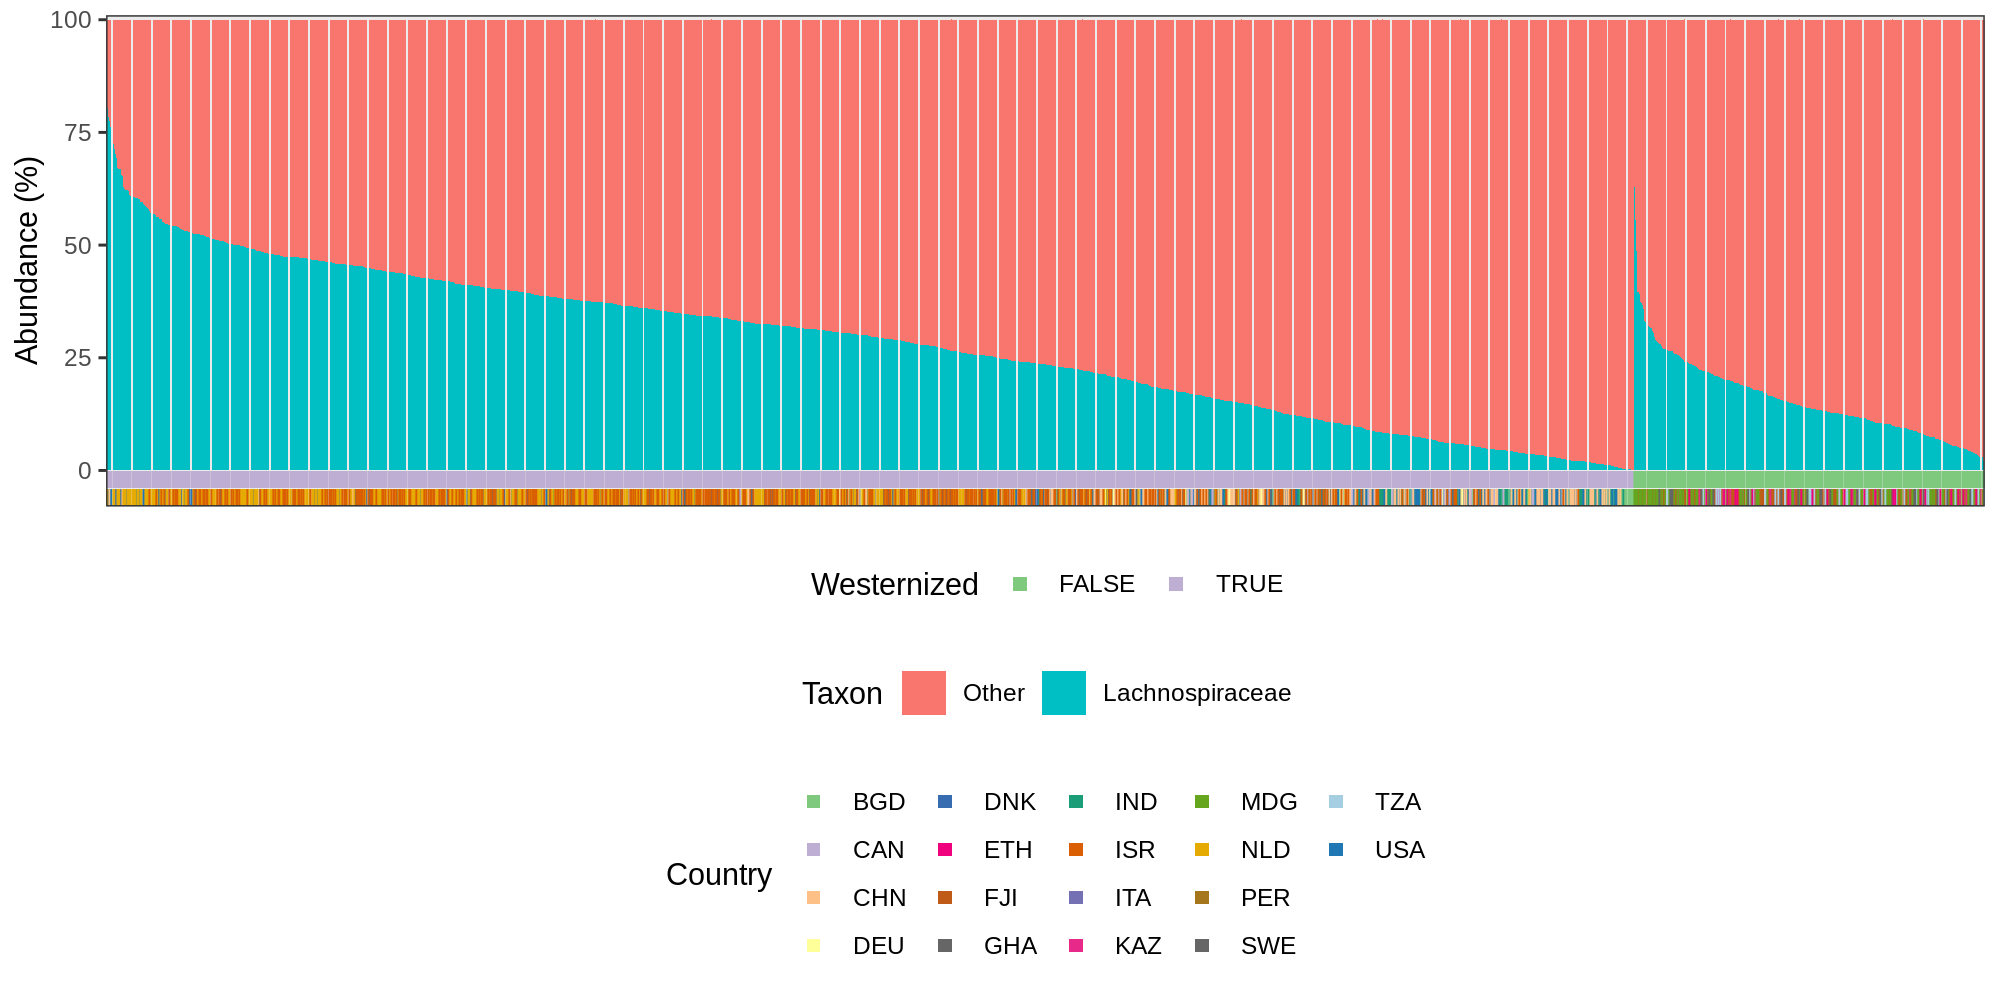

In [13]:
# plotting
X = brk_s %>%
    filter.(taxonomy == 'Lachnospiraceae') %>%
    select.(Sample, dataset_name, Abundance)

brk_sf = brk_s %>%
    inner_join.(X, c('Sample', 'dataset_name')) %>%
    mutate.(Abundance = Abundance * 100) %>%
    mutate.(X = -(westernized %>% as.factor %>% as.numeric) + 
                 -i.Abundance) %>%
    mutate.(Sample = reorder(Sample, X)) %>%
    rename.('Westernized' = westernized) %>%
    mutate.(taxonomy = factor(taxonomy, levels=c('Other', 'Lachnospiraceae')))

p = brk_sf %>%
    ggplot(aes(Sample, Abundance)) +
    geom_bar(stat='identity', aes(fill=taxonomy)) +
    geom_point(aes(y=-2, color=Westernized), shape='|', size=2) +
    scale_color_all('Westernized') +
    guides(color = guide_legend(override.aes = list(shape = 15))) +
    ggnewscale::new_scale_colour() +
    geom_point(aes(y=-6, color=country), shape='|', size=2) +
    scale_color_all('Country') +
    guides(color = guide_legend(override.aes = list(shape = 15))) +
    scale_y_continuous(expand=c(0,0), limits=c(-8,101)) +
    scale_fill_discrete('Taxon') +
    labs(y='Abundance (%)') +
    theme_bw() +
    theme(
        axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        legend.position='bottom',
        legend.box = 'vertical'
    ) 
p.dims(10,5)
plot(p)

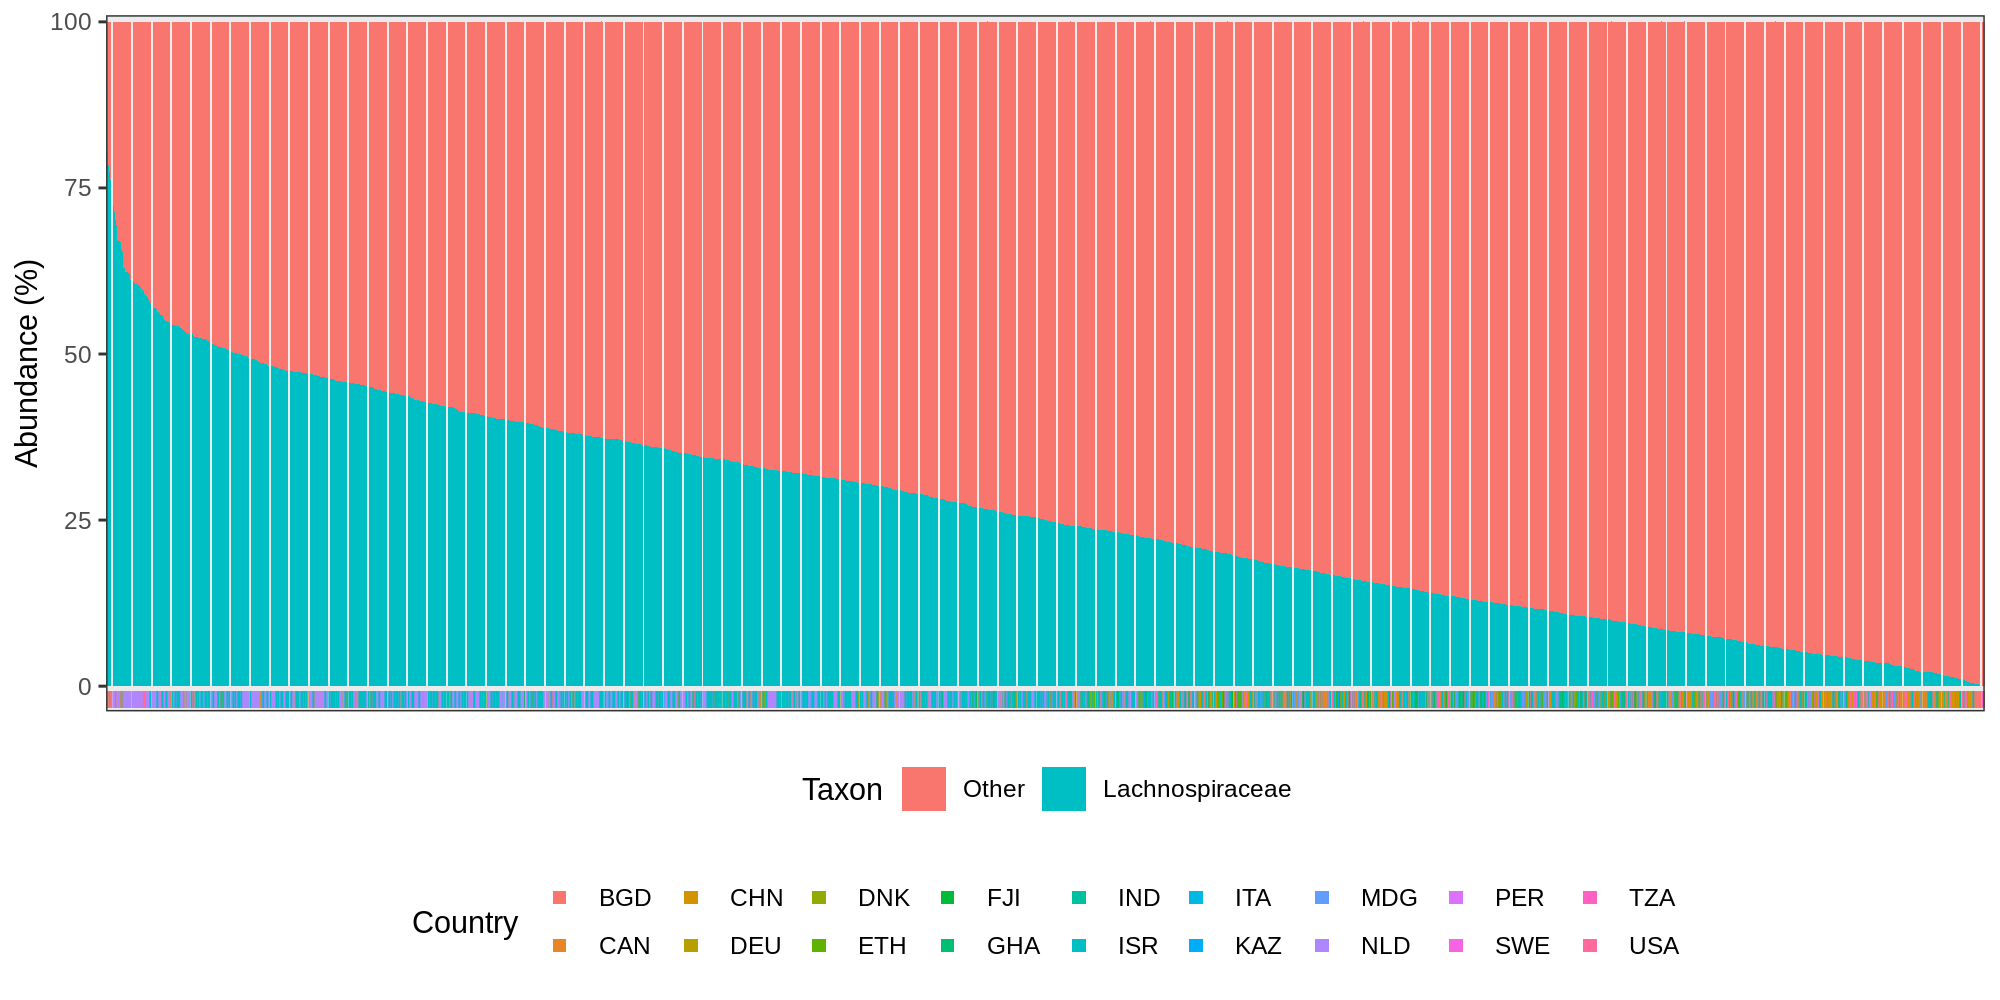

In [14]:
# plotting (modified)
X = brk_s %>%
    filter.(taxonomy == 'Lachnospiraceae') %>%
    select.(Sample, dataset_name, Abundance)

brk_sf = brk_s %>%
    inner_join.(X, c('Sample', 'dataset_name')) %>%
    mutate.(Abundance = Abundance * 100) %>%
    mutate.(Sample = reorder(Sample, -i.Abundance)) %>%
    rename.('Westernized' = westernized) %>%
    mutate.(taxonomy = factor(taxonomy, levels=c('Other', 'Lachnospiraceae')))

p = brk_sf %>%
    ggplot(aes(Sample, Abundance)) +
    geom_bar(stat='identity', aes(fill=taxonomy)) +
    geom_point(aes(y=-2, color=country), shape='|', size=2) +
    scale_color_discrete('Country') +
    guides(color = guide_legend(override.aes = list(shape = 15), nrow=2)) +
    scale_y_continuous(expand=c(0,0), limits=c(-3.8,101)) +
    scale_fill_discrete('Taxon') +
    labs(y='Abundance (%)') +
    theme_bw() +
    theme(
        axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        legend.position='bottom',
        legend.box = 'vertical'
    ) 
p.dims(10,5)
plot(p)

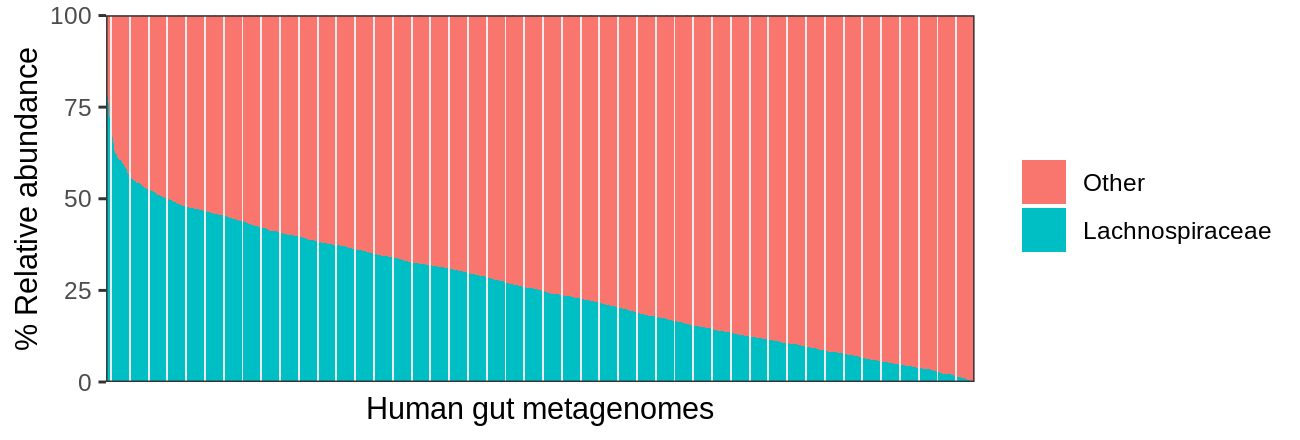

In [32]:
# plotting (modified)
X = brk_s %>%
    filter.(taxonomy == 'Lachnospiraceae') %>%
    select.(Sample, dataset_name, Abundance)

brk_sf = brk_s %>%
    inner_join.(X, c('Sample', 'dataset_name')) %>%
    mutate.(Abundance = Abundance * 100) %>%
    mutate.(Sample = reorder(Sample, -i.Abundance)) %>%
    rename.('Westernized' = westernized) %>%
    mutate.(taxonomy = factor(taxonomy, levels=c('Other', 'Lachnospiraceae')))

p = brk_sf %>%
    ggplot(aes(Sample, Abundance)) +
    geom_bar(stat='identity', aes(fill=taxonomy)) +
    scale_color_discrete('Country') +
    guides(color = guide_legend(override.aes = list(shape = 15), nrow=2)) +
    scale_y_continuous(expand=c(0,0)) +
    scale_fill_discrete(NULL) +
    labs(x='Human gut metagenomes', y='% Relative abundance') +
    theme_bw() +
    theme(
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank()
    ) 
p.dims(6.5,2.2)
plot(p)

In [31]:
# saving the plot
ggsave('~/lachno.pdf', p, height=2.2, width=6.5)

In [33]:
# abund/prev
brk_sf$Abundance %>% summary
brk_sf %>%
    filter.(taxonomy == 'Lachnospiraceae') %>%
    distinct.(Sample, Abundance) %>%
    summarize.(prev = sum(Abundance > 0) / length(Abundance) * 100)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   24.76   50.01   49.99   75.24  100.00 

prev
<dbl>
99.94391


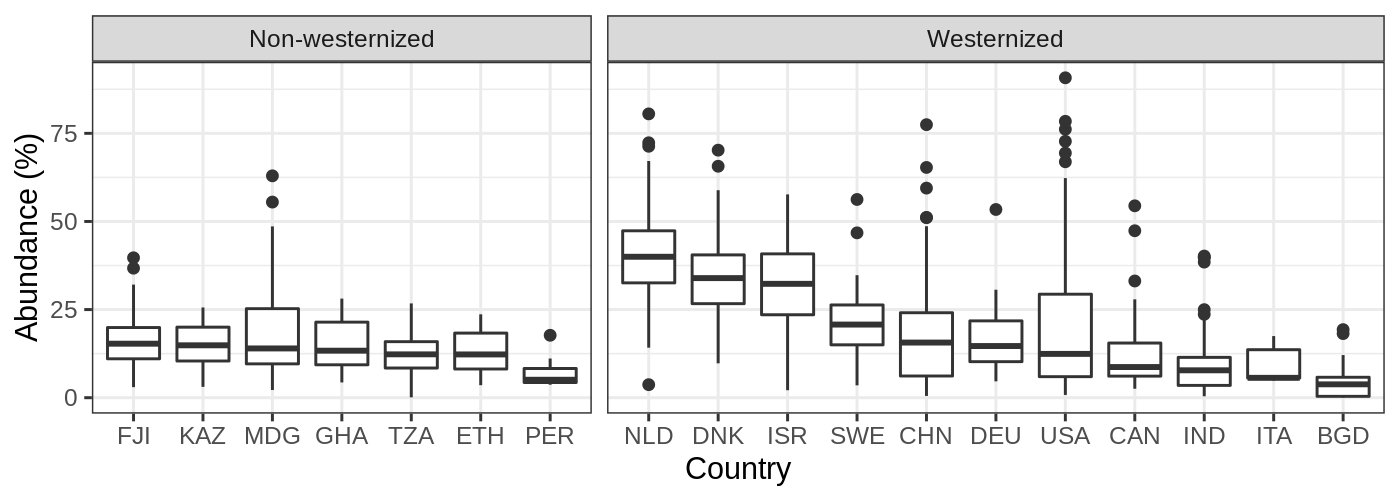

In [34]:
# boxplots
p = brk_s %>%
    filter.(taxonomy == 'Lachnospiraceae') %>%
    mutate.(Abundance = Abundance * 100) %>%
    mutate.(westernized = ifelse(westernized == TRUE, 'Westernized', 'Non-westernized')) %>%
    mutate.(median_abund = median(Abundance, na.rm=TRUE),
            .by=c(country)) %>%
    mutate.(country = reorder(country, -median_abund)) %>%
    ggplot(aes(country, Abundance)) +
    geom_boxplot() +
    facet_grid(. ~ westernized, scales='free_x', space='free_x') +
    labs(x='Country', y='Abundance (%)') +
    theme_bw()
p.dims(7,2.5)
plot(p)

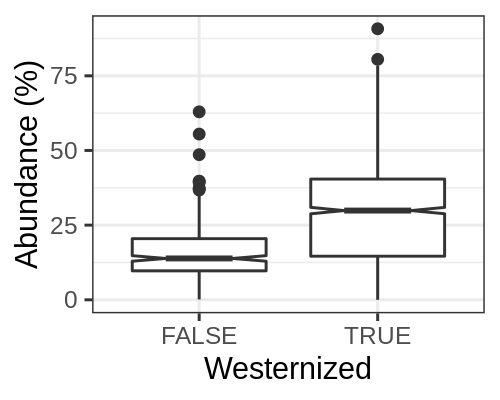

In [45]:
# boxplots
p = brk_s %>%
    filter.(taxonomy == 'Lachnospiraceae') %>%
    mutate.(Abundance = Abundance * 100) %>%
    ggplot(aes(westernized, Abundance)) +
    geom_boxplot(notch=TRUE) +
    labs(x='Westernized', y='Abundance (%)') +
    theme_bw()
p.dims(2.5,2)
plot(p)

In [46]:
# saving the plot
ggsave('~/lachno_boxplot.pdf', p, height=2, width=2.5)

In [36]:
x = brk_s %>%
    filter.(taxonomy == 'Lachnospiraceae',
            westernized == TRUE) %>%
    .$Abundance
y = brk_s %>%
    filter.(taxonomy == 'Lachnospiraceae',
            westernized == FALSE) %>%
    .$Abundance

wilcox.test(x, y, alternative = "greater")


	Wilcoxon rank sum test with continuity correction

data:  x and y
W = 350991, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0


In [37]:
# diff 
x = brk_s %>%
    filter.(taxonomy == 'Lachnospiraceae') 
effsize::cohen.d(x$Abundance, x$westernized)


Cohen's d

d estimate: -1.856857 (large)
95 percent confidence interval:
    lower     upper 
-1.935408 -1.778306 


### anx taxa

In [38]:
# summarize by lachno
to_keep = c('Oscillospiraceae', 'Lachnospiraceae')
brk_s = brk %>%
    mutate.(taxonomy = ifelse(Family %in% to_keep, Family, 'Other')) %>%
    summarize.(Abundance = sum(Abundance),
               .by=c(Sample, dataset_name, westernized, taxonomy, country))
brk_s$taxonomy %>% table
brk_s

.
 Lachnospiraceae Oscillospiraceae            Other 
            1783             1783             1783 

Sample,dataset_name,westernized,taxonomy,country,Abundance
<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>
MV_FEM1_t1Q14,AsnicarF_2017,TRUE,Lachnospiraceae,ITA,0.05577
MV_FEM1_t1Q14,AsnicarF_2017,TRUE,Other,ITA,0.90751
⋮,⋮,⋮,⋮,⋮,⋮
PNP_Validation_46,ZeeviD_2015,TRUE,Other,ISR,0.93951
PNP_Validation_46,ZeeviD_2015,TRUE,Oscillospiraceae,ISR,0.00907


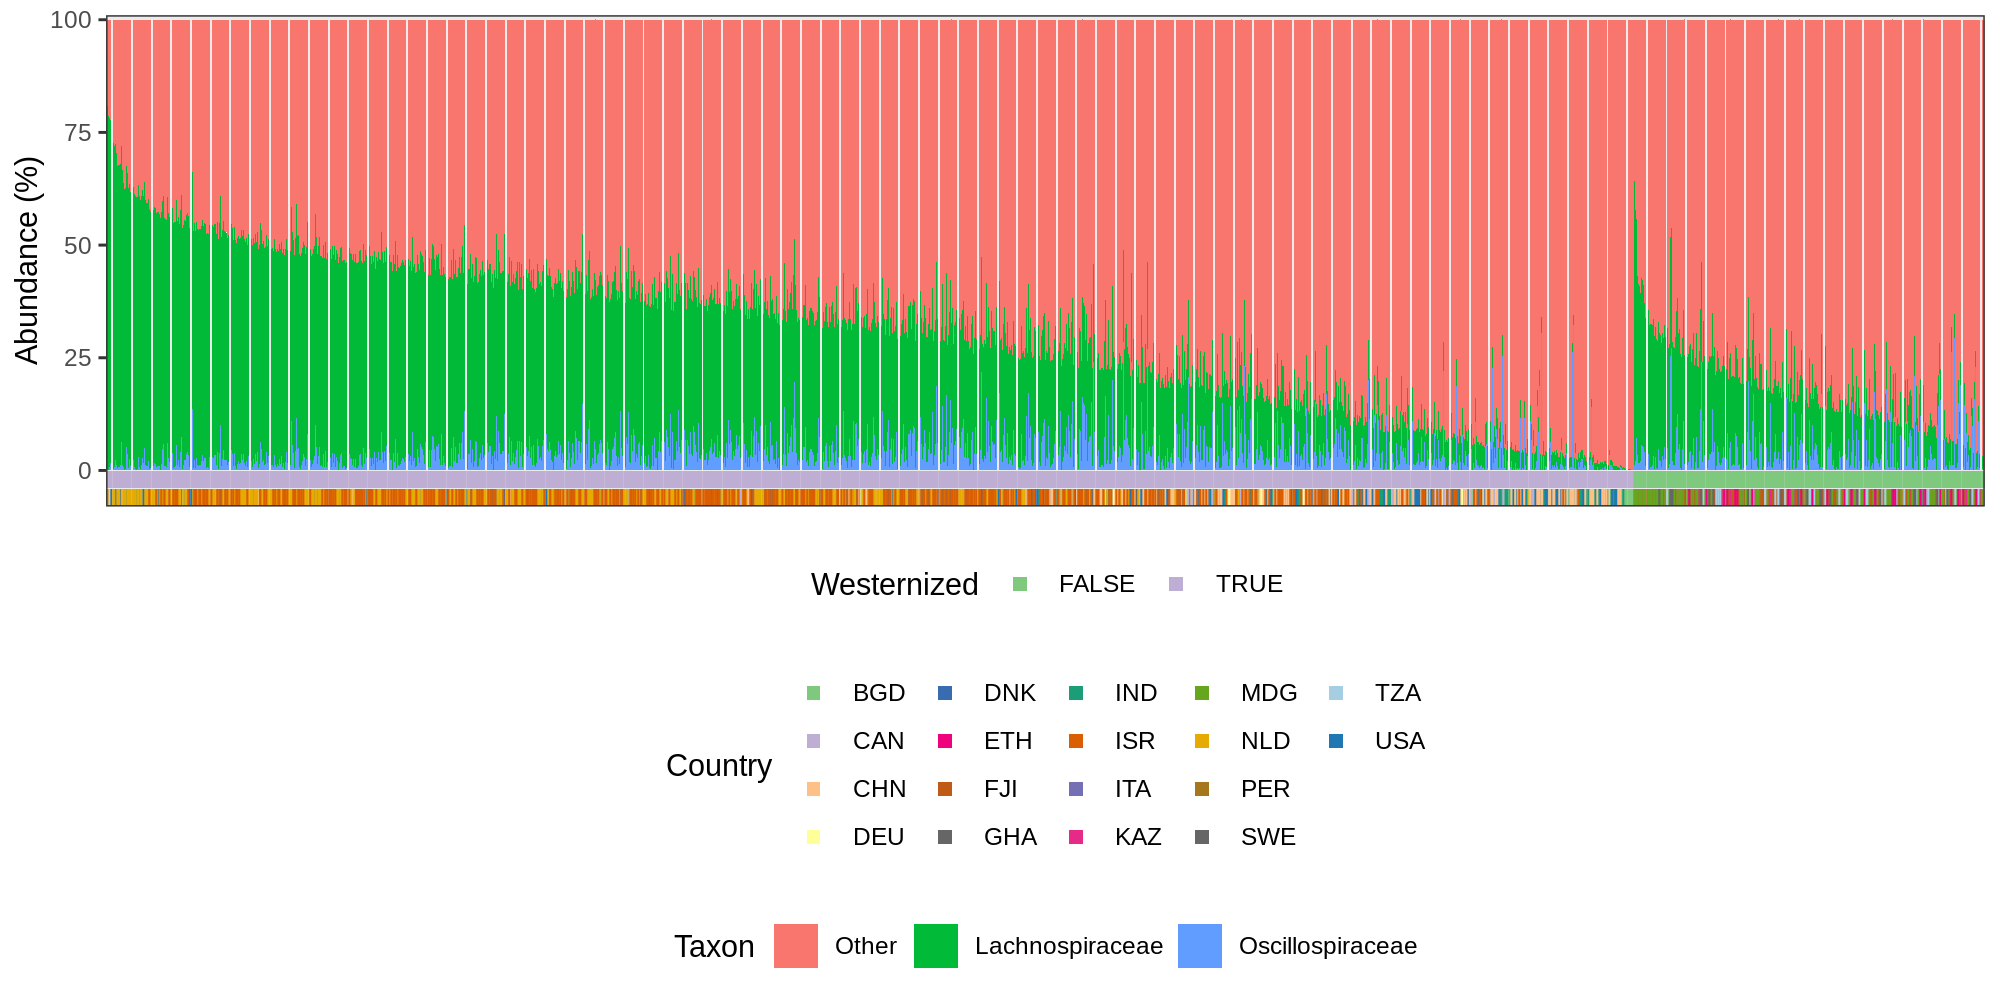

In [39]:
# plotting
X = brk_s %>%
    filter.(taxonomy == 'Lachnospiraceae') %>%
    select.(Sample, dataset_name, Abundance)

brk_sf = brk_s %>%
    inner_join.(X, c('Sample', 'dataset_name')) %>%
    mutate.(Abundance = Abundance * 100) %>%
    mutate.(X = -(westernized %>% as.factor %>% as.numeric) + 
                 -i.Abundance) %>%
    mutate.(Sample = reorder(Sample, X)) %>%
    rename.('Westernized' = westernized) %>%
    mutate.(taxonomy = factor(taxonomy, 
                              levels=c('Other', 
                                       'Lachnospiraceae', 
                                       'Oscillospiraceae')))

p = brk_sf %>%
    ggplot(aes(Sample, Abundance)) +
    geom_bar(stat='identity', aes(fill=taxonomy)) +
    geom_point(aes(y=-2, color=Westernized), shape='|', size=2) +
    scale_color_all('Westernized') +
    guides(color = guide_legend(override.aes = list(shape = 15))) +
    ggnewscale::new_scale_colour() +
    geom_point(aes(y=-6, color=country), shape='|', size=2) +
    scale_color_all('Country') +
    guides(color = guide_legend(override.aes = list(shape = 15))) +
    scale_y_continuous(expand=c(0,0), limits=c(-8,101)) +
    scale_fill_discrete('Taxon') +
    labs(y='Abundance (%)') +
    theme_bw() +
    theme(
        axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        legend.position='bottom',
        legend.box = 'vertical'
    ) 
p.dims(10,5)
plot(p)

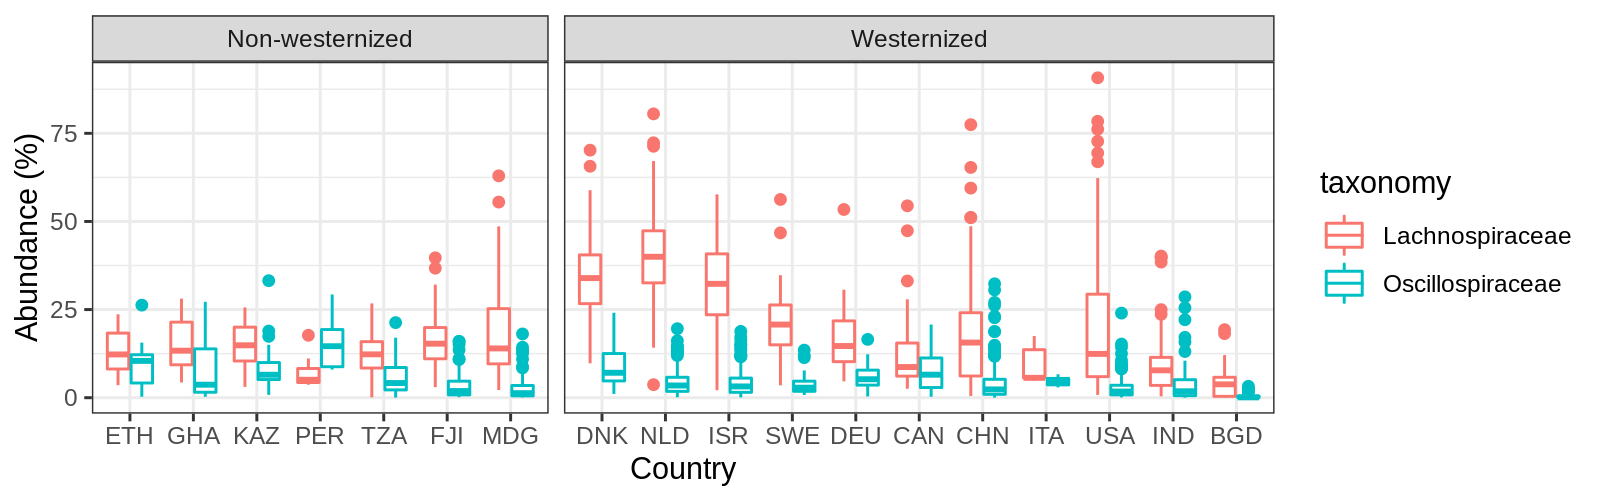

In [40]:
# boxplots
p = brk_s %>%
    filter.(taxonomy %in% to_keep) %>%
    mutate.(Abundance = Abundance * 100) %>%
    mutate.(westernized = ifelse(westernized == TRUE, 'Westernized', 'Non-westernized')) %>%
    mutate.(median_abund = median(Abundance, na.rm=TRUE),
            .by=c(country)) %>%
    mutate.(country = reorder(country, -median_abund)) %>%
    ggplot(aes(country, Abundance, color=taxonomy)) +
    geom_boxplot() +
    facet_grid(. ~ westernized, scales='free_x', space='free_x') +
    labs(x='Country', y='Abundance (%)') +
    theme_bw()
p.dims(8,2.5)
plot(p)

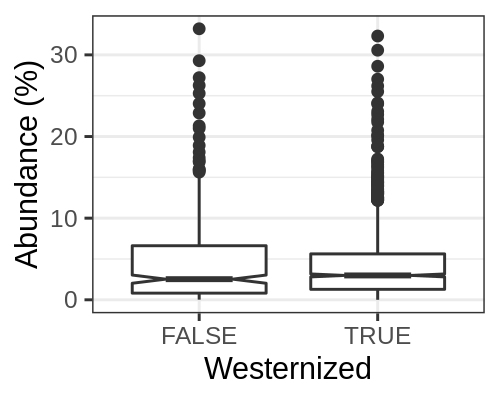

In [41]:
# boxplots
p = brk_s %>%
    filter.(taxonomy == 'Oscillospiraceae') %>%
    mutate.(Abundance = Abundance * 100) %>%
    ggplot(aes(westernized, Abundance)) +
    geom_boxplot(notch=TRUE) +
    labs(x='Westernized', y='Abundance (%)') +
    theme_bw()
p.dims(2.5,2)
plot(p)

In [42]:
x = brk_s %>%
    filter.(taxonomy == 'Oscillospiraceae',
            westernized == TRUE) %>%
    .$Abundance
y = brk_s %>%
    filter.(taxonomy == 'Oscillospiraceae',
            westernized == FALSE) %>%
    .$Abundance

wilcox.test(x, y, alternative = "greater")


	Wilcoxon rank sum test with continuity correction

data:  x and y
W = 250820, p-value = 0.1338
alternative hypothesis: true location shift is greater than 0


In [43]:
x = brk_s %>%
    filter.(taxonomy == 'Oscillospiraceae') 
effsize::cohen.d(x$Abundance, x$westernized)


Cohen's d

d estimate: -2.777097 (large)
95 percent confidence interval:
    lower     upper 
-2.869123 -2.685071 


# sessionInfo

In [44]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /tmp/global2/nyoungblut/code/general/conda_envs/general-tidyverse/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] clustermq_0.8.95.2 LeyLabRMisc_0.2.1  tidytable_0.6.6    data.table_1.14.2 
[5] ggplot2_3.3.5      tidyr_1.1.4        dplyr_1.0.7       

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.7         RColorBrewer_1.1-2 plyr_1.8.6         pillar_1.6.4      
 [5] com